<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
"""
Digits classification using fully connected/Dense LayeSrs
We are going to Diagnosise the model and understand if it has high bias and/or high variance and suggest cures
author:jimmyrais63@gmail.com
"""
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [58]:
#Load the data and split it into training and test set
(x_train,y_train),(x_test,y_test)=mnist.load_data()

This is 5
X_train shape=(60000, 28, 28)
Y_train shape=(60000,)


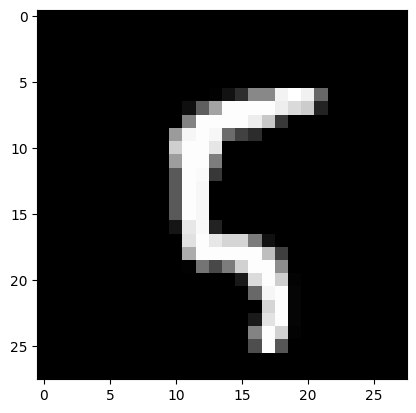

In [59]:
#Visualize training data and verify the shapes
plt.imshow(x_train[100],cmap='gray')
print(f"This is {y_train[100]}")
print(f"X_train shape={x_train.shape}")
print(f"Y_train shape={y_train.shape}")


In [64]:
#Model creation
#The input layer make sure that there won't be shape mismatch
model=Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #Dense(units=25,activation='relu'),
    #Dense(units=16,activation='relu'),
    #Dense(units=10,activation='linear'),
    #This gave 93% accuracy on the training set
    Dense(units=50,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(units=10,activation='linear'),
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5632 - accuracy: 0.5586
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7036 - accuracy: 0.7823
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4074 - accuracy: 0.8945
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2855 - accuracy: 0.9266
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2239 - accuracy: 0.9409
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1961 - accuracy: 0.9485
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1645 - accuracy: 0.9562
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1519 - accuracy: 0.9585
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9625
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.121

In [66]:
#Understanding Bias and/or Variance of the model
#1.Let's create a validation set
import sklearn
from sklearn.model_selection import train_test_split
x_cv,x_t,y_cv,y_t=train_test_split(x_test,y_test,test_size=0.2)
print(f"Validation_set size={x_cv.shape}")
print(f"Test_set siwe={x_t.shape}")
#Evaluate Jtrain(Loss function on the training set)
J_train=model.evaluate(x_train,y_train)
#Evaluate Jcv(Loss Function on the dev set(Validation set))
J_cv=model.evaluate(x_cv,y_cv)

Validation_set size=(8000, 28, 28)
Test_set siwe=(2000, 28, 28)
250/250 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9553


1/1 [==============================] - 0s 63ms/step
We are trying to classify the below digit using a neural network model:
The result given by the neural network is 0


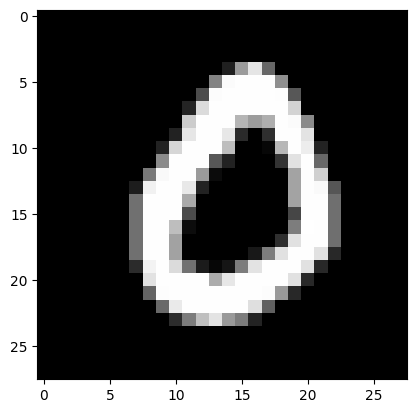

In [67]:
# The loss obtained on the validation set is slightly less than the one obtained on the training set,this implies that the model does not have
#high variance,however the model seems to have high bias(obtained 92% accuracy withe the initial network)if I consider as performance baseline 96%
#Cure for High Bias networks: 1.Increase the complexity of the network(more Number of layers or units per layer(initially we had
#25 units in the first layer,16 in the second and 10 in the o/p layer,try to increase
# The second solution is to decrease the regularization factor and observe the result
#Predictions
import numpy as np
#Reshape the input image so that it will be compatible with the input layer of the neural network
predictions=model.predict(x_t[0].reshape(1,28,28))
#Covert numerical predictions into probabilities using the softmax activation,this approach helps to reduce numerical round off errors
pred=tf.nn.softmax(predictions)
print("We are trying to classify the below digit using a neural network model:")
plt.imshow(x_t[0],cmap='gray')
print(f"The result given by the neural network is {np.argmax(pred)}")